Importing necessary libraries and training dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/train.csv')
train_df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


Viewing basic distribution of the columns of the dataset

<Axes: >

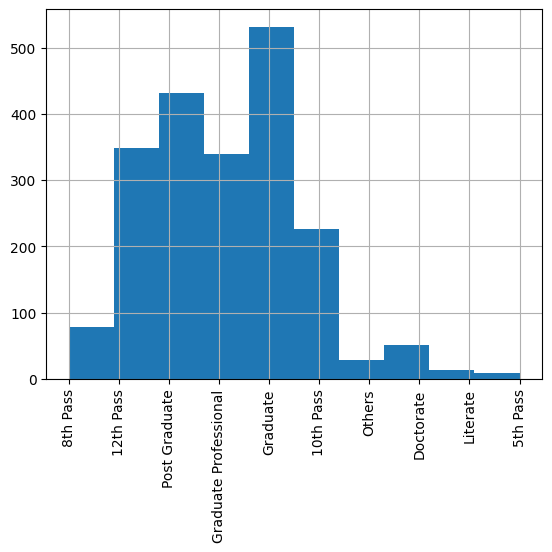

In [2]:
train_df['Education'].hist(xrot=90)

<Axes: >

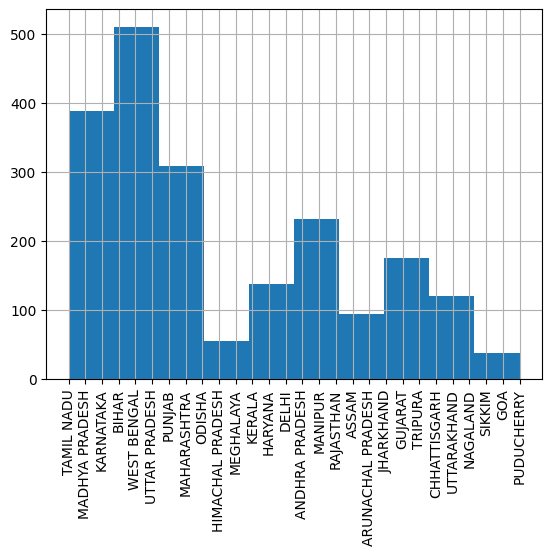

In [3]:
train_df['state'].hist(xrot=90)

<Axes: >

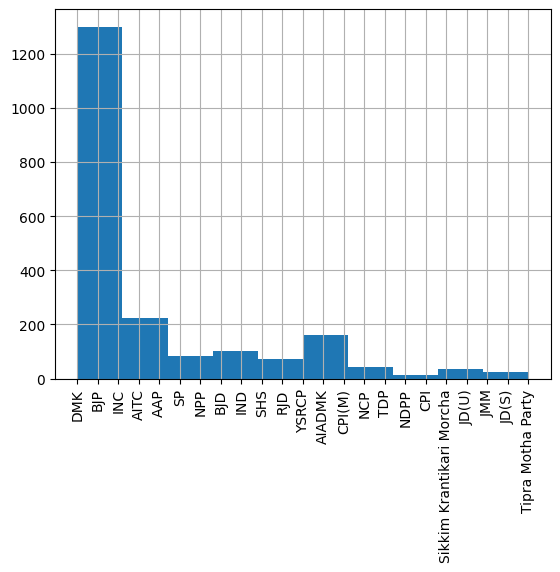

In [4]:
train_df['Party'].hist(xrot=90)

<Axes: >

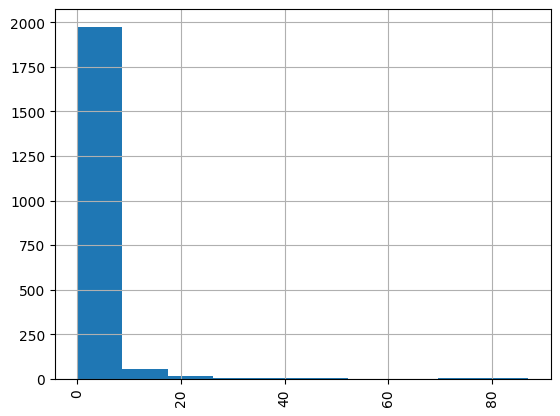

In [5]:
train_df['Criminal Case'].hist(xrot=90)

    Since data points are very less and it is very skewed towards a certain classes, let I have generated synthetic data by using CtGAN Approach. Since I was having troubles verifying my phone number on kaggle, it did not allow me to use internet in the kaggle notebook. The code for synthesizing data is given [here](https://colab.research.google.com/drive/1kGjcZmSdl2IITnneCV7jnKvmeqVbZEvV?usp=sharing).

In [6]:
train_df = pd.read_csv('/kaggle/input/synthetic-politicians/synthetic (1).csv')

Converting text data of assets and liabilites to numeric data

In [7]:
assets = train_df['Total Assets']
liabilities = train_df['Liabilities']
categories = set()

for asset in assets:
    words = asset.split()
    if (len(words) > 1):
        categories.add(words[1])
        
for liability in liabilities:
    words = liability.split()
    if (len(words) > 1):
        categories.add(words[1])
        
categories

{'Crore+', 'Hund+', 'Lac+', 'Thou+'}

<Axes: >

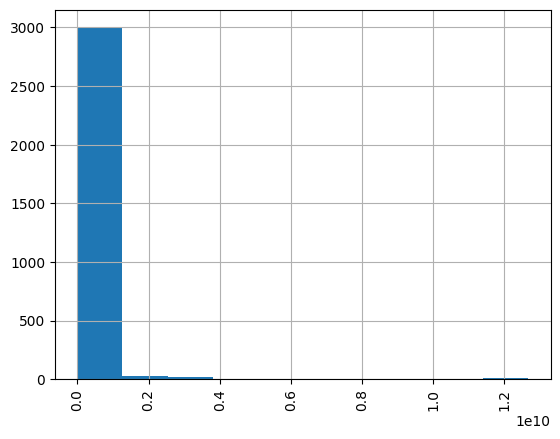

In [8]:
total_assets = []
for asset in assets:
    words = asset.split()
    if (len(words) > 1):
        magnitude = words[1]
        num = int(words[0])
        if (magnitude == 'Crore+'):
            num *= 10**7
        if (magnitude == 'Lac+'):
            num *= 10**5
        if (magnitude == 'Thou+'):
            num *= 10**3
        if (magnitude == 'Hund+'):
            num *= 100
        total_assets.append(num)
    else:
        total_assets.append(int(words[0]))

total_liabilities = []
for liability in liabilities:
    words = liability.split()
    if (len(words) > 1):
        magnitude = words[1]
        num = int(words[0])
        if (magnitude == 'Crore+'):
            num *= 10**7
        if (magnitude == 'Lac+'):
            num *= 10**5
        if (magnitude == 'Thou+'):
            num *= 10**3
        total_liabilities.append(num)
    else:
        total_liabilities.append(int(words[0]))

train_df["Total Assets"] = total_assets
train_df["Liabilities"] = total_liabilities
train_df["Total Assets"].hist(xrot=90)

<Axes: >

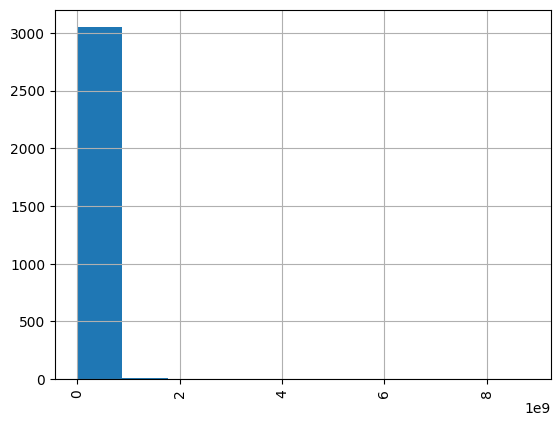

In [9]:
train_df["Liabilities"].hist(xrot=90)

Text(0, 0.5, 'Total Liabilities')

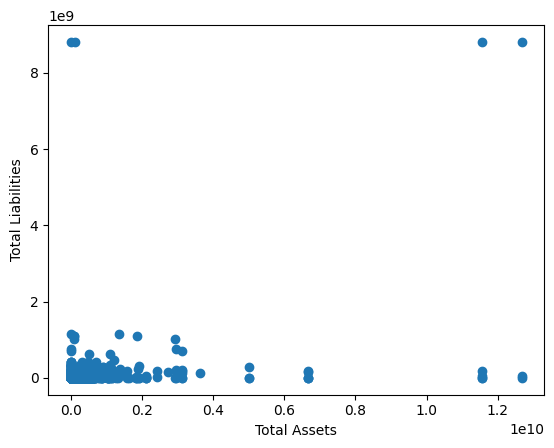

In [10]:
plt.scatter(train_df['Total Assets'], train_df['Liabilities'], )
plt.xlabel('Total Assets')
plt.ylabel('Total Liabilities')

In [11]:
train_df = train_df[train_df['Total Assets'] < 3*10**9]
train_df = train_df[train_df['Liabilities'] < 0.5*10**9]

Text(0, 0.5, 'Total Liabilities')

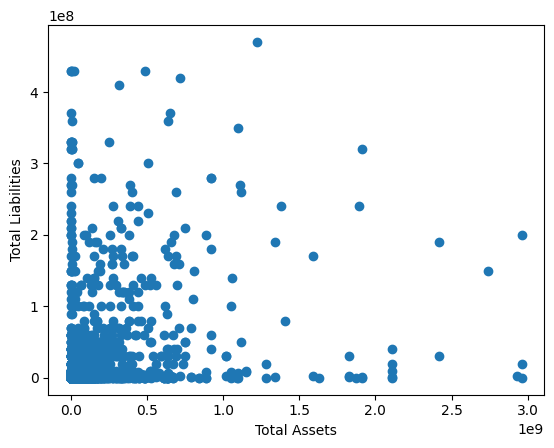

In [12]:
plt.scatter(train_df['Total Assets'], train_df['Liabilities'])
plt.xlabel('Total Assets')
plt.ylabel('Total Liabilities')

Text(0, 0.5, 'Percent of Candidates')

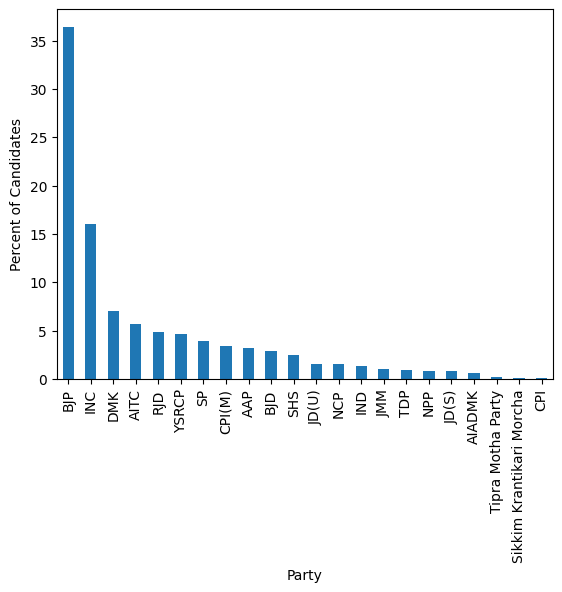

In [13]:
sorted_df = train_df.sort_values(by='Criminal Case', ascending=False)
top_percentile = sorted_df.head(int(len(sorted_df)*0.25))
party_percent = top_percentile['Party'].value_counts(normalize=True) * 100

party_percent.plot(kind='bar')
plt.ylabel('Percent of Candidates')

Text(0, 0.5, 'Percent of Candidates')

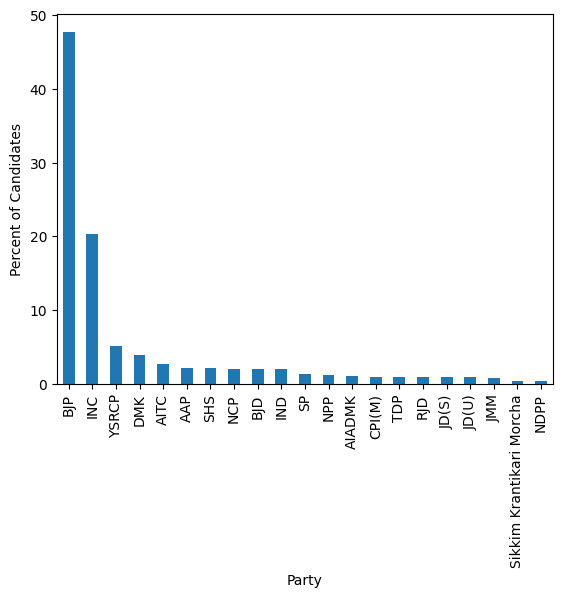

In [14]:
sorted_df = train_df.sort_values(by='Total Assets', ascending=False)
top_percentile = sorted_df.head(int(len(sorted_df)*0.25))
party_percent = top_percentile['Party'].value_counts(normalize=True) * 100

party_percent.plot(kind='bar')
plt.ylabel('Percent of Candidates')

In [15]:
Y = train_df['Education']
X = train_df.drop(['Education'], axis=1)

X, Y

(      Unnamed: 0    ID                  Candidate  Constituency ∇  Party  \
 0              0   500              sdv-pii-1yd3o   sdv-pii-a4l0v    BJP   
 1              1   501              sdv-pii-84xm0   sdv-pii-ise5n    BJD   
 2              2   502              sdv-pii-p4mjq   sdv-pii-8rv6r   AITC   
 3              3   503              sdv-pii-0lguj   sdv-pii-l5c6a  JD(U)   
 4              4   504              sdv-pii-sgo1a   sdv-pii-h7ugz    BJP   
 ...          ...   ...                        ...             ...    ...   
 3054        3054  2054                    V. Sasi  CHIRAYINKEEZHU    CPI   
 3055        3055  2055          Pushkar Lal Dangi           MAVLI    INC   
 3056        3056  2056          Dr. Manju Shiwach      MODI NAGAR    BJP   
 3057        3057  2057  Mansing Fattesingrao Naik         SHIRALA    NCP   
 3058        3058  2058                Nyato Rigia          TALIHA    BJP   
 
       Criminal Case  Total Assets  Liabilities              state  
 0   

Generally, asset/liabilities ratio is also a very useful tool to judge financial traits, so I have created this extra feature with the hopes that our model is better

In [16]:
X['Ratio'] = X['Total Assets'].divide(X['Liabilities']).replace(np.inf, 1e10).replace(np.nan, 0)

In [17]:
X['Ratio'].describe()

count    3.022000e+03
mean     2.157513e+09
std      4.114105e+09
min      0.000000e+00
25%      3.157051e+00
50%      1.339744e+01
75%      3.928571e+02
max      1.000000e+10
Name: Ratio, dtype: float64

In [18]:
from sklearn.preprocessing import OrdinalEncoder
party_encoder = OrdinalEncoder()
X['Party'] = party_encoder.fit_transform(X['Party'].values.reshape(-1, 1))

In [19]:
X

,Unnamed: 0,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Ratio
0,0,500,sdv-pii-1yd3o,sdv-pii-a4l0v,4.0,1,50000000,0,Nevada,1.000000e+10
1,1,501,sdv-pii-84xm0,sdv-pii-ise5n,3.0,0,20000000,0,New Hampshire,1.000000e+10
2,2,502,sdv-pii-p4mjq,sdv-pii-8rv6r,2.0,2,40000000,0,Maryland,1.000000e+10
3,3,503,sdv-pii-0lguj,sdv-pii-l5c6a,11.0,3,30000000,3300000,Washington,9.090909e+00
4,4,504,sdv-pii-sgo1a,sdv-pii-h7ugz,4.0,1,50000000,5300000,Maine,9.433962e+00
...,...,...,...,...,...,...,...,...,...,...
3054,3054,2054,V. Sasi,CHIRAYINKEEZHU,5.0,1,6100000,1000000,KERALA,6.100000e+00
3055,3055,2055,Pushkar Lal Dangi,MAVLI,8.0,0,20000000,800000,RAJASTHAN,2.500000e+01
3056,3056,2056,Dr. Manju Shiwach,MODI NAGAR,4.0,0,130000000,8500000,UTTAR PRADESH,1.529412e+01
3057,3057,2057,Mansing Fattesingrao Naik,SHIRALA,13.0,1,250000000,9400000,MAHARASHTRA,2.659574e+01


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=204, train_size=0.8, shuffle=True) 

In [21]:
from sklearn.preprocessing import OrdinalEncoder
education_encoder = OrdinalEncoder()
Y_train = education_encoder.fit_transform(Y_train.values.reshape(-1, 1))
Y_valid = education_encoder.transform(Y_valid.values.reshape(-1,1))

In [22]:
X_train = X_train.drop(columns=['ID', 'Candidate', 'Constituency ∇', 'state'])
X_valid = X_valid.drop(columns=['ID', 'Candidate', 'Constituency ∇', 'state'])

In [23]:
X_train

,Unnamed: 0,Party,Criminal Case,Total Assets,Liabilities,Ratio
1488,1488,4.0,2,100000000,0,1.000000e+10
22,22,9.0,1,1100000,300000,3.666667e+00
1605,1605,4.0,1,30000000,0,1.000000e+10
995,995,4.0,2,20000000,90000,2.222222e+02
1755,1755,4.0,0,120000000,0,1.000000e+10
...,...,...,...,...,...,...
2687,2687,6.0,4,10000000,0,1.000000e+10
2621,2621,4.0,0,72000,0,1.000000e+10
254,254,4.0,0,20000000,60000000,3.333333e-01
1818,1818,4.0,0,60000000,6100000,9.836066e+00


In [24]:
X_train = X_train.drop(columns='Unnamed: 0', axis=1)
X_valid = X_valid.drop(columns='Unnamed: 0', axis=1)

In [25]:
from sklearn.preprocessing import StandardScaler

assets_scaler = StandardScaler()
liabilities_scaler = StandardScaler()
criminals_scaler = StandardScaler()
ratio_scaler = StandardScaler()

X_train['Total Assets'] = assets_scaler.fit_transform(np.array(X_train['Total Assets']).reshape(-1,1))
X_train['Liabilities'] = liabilities_scaler.fit_transform(np.array(X_train['Liabilities']).reshape(-1,1))
X_train['Criminal Case'] = criminals_scaler.fit_transform(np.array(X_train['Criminal Case']).reshape(-1,1))
X_train['Ratio'] = ratio_scaler.fit_transform(np.array(X_train['Ratio']).reshape(-1,1))

X_valid['Total Assets'] = assets_scaler.transform(np.array(X_valid['Total Assets']).reshape(-1,1))
X_valid['Liabilities'] = liabilities_scaler.transform(np.array(X_valid['Liabilities']).reshape(-1,1))
X_valid['Criminal Case'] = criminals_scaler.transform(np.array(X_valid['Criminal Case']).reshape(-1,1))
X_valid['Ratio'] = ratio_scaler.transform(np.array(X_valid['Ratio']).reshape(-1,1))

<Axes: >

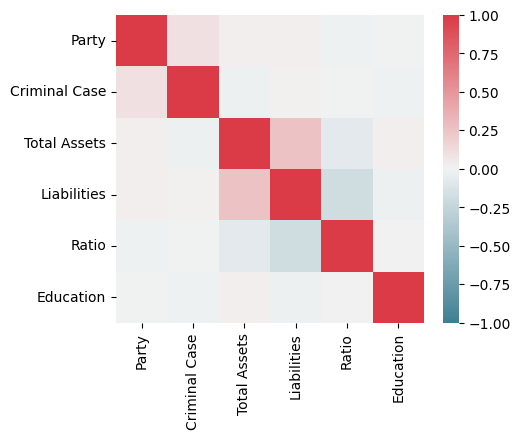

In [26]:
import seaborn as sns

temp = X_train.copy()
temp['Education'] = Y_train

f, ax = plt.subplots(figsize=(5, 4))
corr = temp.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [27]:
X_train

,Party,Criminal Case,Total Assets,Liabilities,Ratio
1488,4.0,0.049757,-0.018227,-0.339745,1.884619
22,9.0,-0.189810,-0.414912,-0.333892,-0.530611
1605,4.0,-0.189810,-0.298995,-0.339745,1.884619
995,4.0,0.049757,-0.339105,-0.337989,-0.530611
1755,4.0,-0.429376,0.061992,-0.339745,1.884619
...,...,...,...,...,...
2687,6.0,0.528890,-0.379214,-0.339745,1.884619
2621,4.0,-0.429376,-0.419035,-0.339745,1.884619
254,4.0,-0.429376,-0.339105,0.830767,-0.530611
1818,4.0,-0.429376,-0.178666,-0.220743,-0.530611


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import NuSVC

lr = LogisticRegression().fit(X_train, Y_train)
d = DecisionTreeClassifier().fit(X_train, Y_train)
r = RandomForestClassifier().fit(X_train, Y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=.1, max_depth=5, random_state=0).fit(X_train, Y_train)
svc = OneVsRestClassifier(SVC(gamma='auto', max_iter=100000)).fit(X_train, Y_train)

models = {
    'logistic': lr,
    'decision_tree': d,
    'random_forest': r,
    'knn': knn,
    'gradient_booster': gb,
    'svc': svc
}

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_18/2687089237.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r = RandomForestClassifier().fit(

Taking the majority out of all the trained models

In [29]:
preds = []

for model in models:
    pred = models[model].predict(X_train)
    preds.append(pred)
    
preds

[array([9., 5., 9., ..., 5., 5., 5.]),
 array([9., 9., 9., ..., 8., 1., 6.]),
 array([9., 9., 9., ..., 8., 1., 6.]),
 array([9., 1., 9., ..., 5., 0., 5.]),
 array([9., 9., 2., ..., 8., 1., 6.]),
 array([9., 6., 1., ..., 0., 3., 6.])]

In [30]:
from collections import Counter

n = X_train.shape[0]
final_pred = [0]*n

for i in range(n):
    temp = []
    for j in range(len(models)):
        temp.append(preds[j][i])
    final_pred[i] = Counter(temp).most_common(1)[0][0]

Accuracy:  0.8427803061646669


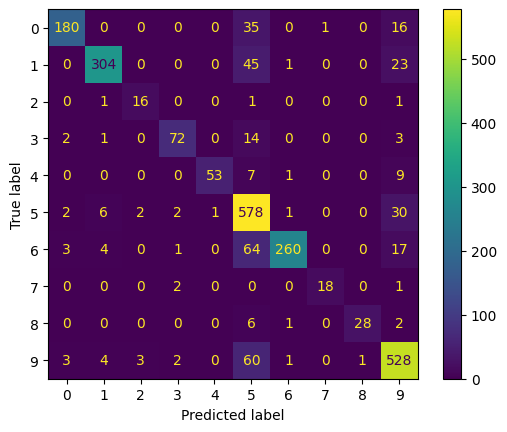

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy: ", accuracy_score(Y_train, final_pred))

cm = confusion_matrix(Y_train, final_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

plt.show()

Accuracy:  0.18181818181818182


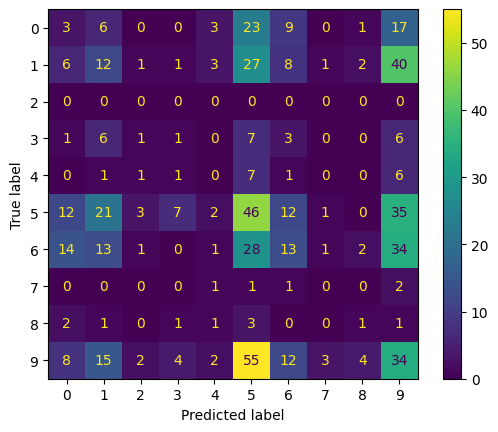

In [32]:
preds = []

for model in models:
    pred = models[model].predict(X_train)
    preds.append(pred)
    
from collections import Counter

n = X_valid.shape[0]
final_pred = [0]*n

for i in range(n):
    temp = []
    for j in range(len(models)):
        temp.append(preds[j][i])
    final_pred[i] = Counter(temp).most_common(1)[0][0]

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Accuracy: ", accuracy_score(Y_valid, final_pred))

cm = confusion_matrix(Y_valid, final_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

plt.show()

In [33]:
test_df = pd.read_csv('/kaggle/input/who-is-the-real-winner/test.csv')

assets = test_df['Total Assets']
liabilities = test_df['Liabilities']
categories = set()

for asset in assets:
    words = asset.split()
    if (len(words) > 1):
        categories.add(words[1])
        
for liability in liabilities:
    words = liability.split()
    if (len(words) > 1):
        categories.add(words[1])
        
categories
total_assets = []
for asset in assets:
    words = asset.split()
    if (len(words) > 1):
        magnitude = words[1]
        num = int(words[0])
        if (magnitude == 'Crore+'):
            num *= 10**7
        if (magnitude == 'Lac+'):
            num *= 10**5
        if (magnitude == 'Thou+'):
            num *= 10**3
        if (magnitude == 'Hund+'):
            num *= 100
        total_assets.append(num)
    else:
        total_assets.append(int(words[0]))

total_liabilities = []
for liability in liabilities:
    words = liability.split()
    if (len(words) > 1):
        magnitude = words[1]
        num = int(words[0])
        if (magnitude == 'Crore+'):
            num *= 10**7
        if (magnitude == 'Lac+'):
            num *= 10**5
        if (magnitude == 'Thou+'):
            num *= 10**3
        total_liabilities.append(num)
    else:
        total_liabilities.append(int(words[0]))

test_df["Total Assets"] = total_assets
test_df["Liabilities"] = total_liabilities

In [34]:
test_df = test_df.drop(columns=['ID', 'Candidate', 'Constituency ∇', 'state', ])
test_df['Ratio'] = test_df['Total Assets'].divide(test_df['Liabilities']).replace(np.inf, 1e10).replace(np.nan, 0)

test_df['Total Assets'] = assets_scaler.transform(np.array(test_df['Total Assets']).reshape(-1,1))
test_df['Liabilities'] = liabilities_scaler.transform(np.array(test_df['Liabilities']).reshape(-1,1))
test_df['Criminal Case'] = criminals_scaler.transform(np.array(test_df['Criminal Case']).reshape(-1,1))
test_df['Ratio'] = ratio_scaler.transform(np.array(test_df['Ratio']).reshape(-1,1))

In [35]:
test_df['Party'] = party_encoder.transform(test_df['Party'].values.reshape(-1, 1))

In [36]:
test_df

,Party,Criminal Case,Total Assets,Liabilities,Ratio
0,9.0,0.049757,2.388352,1.806195,-0.530611
1,2.0,-0.189810,-0.339105,-0.314384,-0.530611
2,13.0,0.289324,1.546049,-0.144660,-0.530611
3,2.0,-0.189810,-0.339105,-0.339745,1.884619
4,18.0,-0.429376,0.222430,0.050426,-0.530611
...,...,...,...,...,...
1369,4.0,-0.429376,-0.379214,-0.339745,1.884619
1370,3.0,-0.189810,-0.419324,-0.314384,-0.530611
1371,8.0,-0.189810,-0.218776,-0.339745,1.884619
1372,4.0,-0.189810,-0.339105,-0.329991,-0.530611


In [37]:
preds = []

for model in models:
    pred = models[model].predict(test_df)
    preds.append(pred)
    
from collections import Counter

n = test_df.shape[0]
Y_pred = [0]*n

for i in range(n):
    temp = []
    for j in range(len(models)):
        temp.append(preds[j][i])
    Y_pred[i] = Counter(temp).most_common(1)[0][0]

Y_pred = education_encoder.inverse_transform(np.array(Y_pred).reshape(-1,1))
Y_pred = pd.DataFrame(Y_pred)

In [38]:
Y_pred.to_csv("ensemble.csv")